## Model Selection for Prediction

As you've learned in the previous week, the process of model selection is critical in order to ensure that your model is working with  hyperparameters that allow it to achieve the best results. The same considerations for classification, that is, the trade-off between bias and variance apply in the case of prediction as well:  high bias means that the model misses the relevant relationships between the variables or features and high variance pays so much atention to the details of the training dataset that it makes it almost impossible to generalize.

The good news is that the techniques and tools that you learned about last week, namely, GridSearchCV and RandomizedSearchCV work in prediction as well. In the example, you'll be using the now famous iris dataset to predict future values.

In [1]:
# Load libraries
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Create a Logistic Regression

In [2]:
# Create logistic regression
logistic = linear_model.LogisticRegression()
logistic.fit(X,y)
Xnew=logistic.predict(X)
print(logistic.coef_)

[[-0.41838753  0.96638379 -2.52068484 -1.08415186]
 [ 0.52988059 -0.314424   -0.19985283 -0.94748126]
 [-0.11149307 -0.6519598   2.72053767  2.03163312]]


/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [3]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

### Create a Grid Search

In [4]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [5]:
### Conduct Grid Search

In [6]:
# Fit grid search
best_model = clf.fit(X, y)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])



/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarnin

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

Best Penalty: l2
Best C: 7.742636826811269


/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: 

### Perform Prediction

In [7]:
# Predict target vector
best_model.predict(X)
#print(best_model.)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


([], <a list of 0 Text major ticklabel objects>)

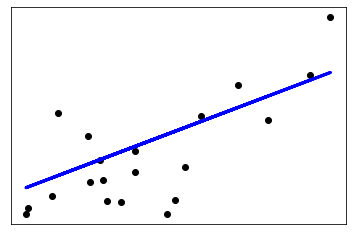

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

#plt.inline()

## Candidate Model Evaluation

In classification, a model's performance is evaluated by how far its classification of new data is from the established truth. This is given by comparing the results of the classifier to previously labelled data, considered ground truth.

**Naive Baseline - Mean**
To obtain a mean value baseline, you will compute the mean value for your dataset and you will then assign that mean value to an array the size of your test set. You can compute this using the **mean** function from **numpy** to compute the mean and the **repeat()** function to then create an array with the mean value in it.

**More Complex Baseline - Dummy Regression**
DummyRegressor from scikit-learn is a regressor that performs predictions using simple rules or strategies, such as "mean", "median", "quantile", "constant". You can create this using **DummyRegressor** from scikit-learn.
Strategy to use to generate predictions.


### Comparison with the Baseline - Mean Square Error
You will need to use a metric to compare your model with the naive baseline using mean. This metric will give you a measure of how much better (or worse) your newly developed model is when compared to the baseline. You can use a variety of metrics, such as variance, mean, standard deviation among others, however these metrics do not capture the differences between every point in the dataset and the mean. To address that, in this topic, you will be using the Root Mean Square Error (RMSE) metric.

RMSE is the standard deviation of the residuals, capturing prediction errors.  Residuals are a measure of how far from the regression line the data points are, and thus the RMSE is a measure of how spread out these residuals are. In other words, RMSE tells you how concentrated the data is around the line of best fit.

To compute RMSE for an array of $N$ elements and predicted values $p_i$ over real data or baseline $b_i$, you can follow these three steps:
1. Compute the residuals, and square them: $(p_i - b_i)^2$
2. Compute the average of the residuals: $\frac{\displaystyle \sum_i^N{(p_i - b_i)^2}}{N}$
3. Compute the square root of the average

leading to the final formula below:

$$RMSE = \sqrt{\frac{\displaystyle \sum_i^N{(p_i - b_i)^2}}{N}}$$

The functions to compute RMSE are **mean_squared_error**, which computes the mean squared error, and **sqrt** from the **numpy** library, which computes the square root.

More details can be found at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

### Example - Mean Baseline

In this example, you will create two random arrays of size $N=10$. You will create a mean baseline for the first array, and then compute the RMSE between the second array and the mean array and print it.


In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error

#create the first array
array1 = np.random.rand(10,1)

#create the mean 
mean = np.mean(array1)

#create the mean baseline
meanb = np.repeat(mean, len(array1))

#create the second array
array2 = np.random.rand(10,1)

#compute the mean squared error
RMSE = mean_squared_error(meanb, array2)

#compute the residual mean squared error
RMSE=np.sqrt(RMSE)

print(RMSE)

0.18516073424387683


### Example - Dummy Regressor

In this example, you will create two random arrays, array1 and array2. You will compute the mean baseline for array1 and use a dummy regressor with a "median" strategy to compute the regression for array2. 

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

#create the first array
array1 = np.random.rand(10,1)

#create the mean 
mean = np.mean(array1)

#create the mean baseline
meanb = np.repeat(mean, len(array1))

#create the second array
array2 = np.random.rand(10,1)
y = np.random.rand(10,1)

#creating the DummyRegressor with a "median strategy"
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(array2, y)

#predicting the final value
final_array = dummy_regr.predict(array2,10)

print(meanb)
print(final_array)


[0.61034797 0.61034797 0.61034797 0.61034797 0.61034797 0.61034797
 0.61034797 0.61034797 0.61034797 0.61034797]
(array([0.45685613, 0.45685613, 0.45685613, 0.45685613, 0.45685613,
       0.45685613, 0.45685613, 0.45685613, 0.45685613, 0.45685613]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))


### Practice on Your Own 

Once you have created the two arrays, array1 and final_array, compute their RMSE.

#### Solution


In [11]:
#compute the mean squared error
RMSE = mean_squared_error(meanb, final_array[0])

#compute the residual mean squared error
RMSE=np.sqrt(RMSE)

print(RMSE)

0.15349183657301785



# Support Vector Machine regression

You explored before the use of  support vector machines for classification. In this section, you will use SVM to perform predictions, using a process called **regression**. The use of support vector machines to perform regression is sometimes abbreviated as SVR. The support vector regression has the main characteristics that describe the original SVM algorithm, meaning that is uses the  maximal margin to separate the classes. SVR uses the same steps of the SVC classifier to perform classification, namely, minimizing the error and identifying the hyperplane, with minor differences: 

* Margin tolerance - Predicting a continuous output becomes computationally difficult due to the infinite possibilities that the SVR has to consider. As such, a margin tolerance called epsilon is used in SVR. CS: what is this margin?

* Algorithm complexity  - the hyperplance selected needs to maximize the margin, keeping in mind the error that needs to be tolerated. This makes the regression algorithm more complicated. 


alt = Epsilon margin in SVR


Below is an example of prediction using SVR.

### Example of using Support Vector Machines for regression 

To perform SVM regression, you will use the Boston Housing dataset. This dataset has 508 samples and 13 features. You will  be predicting the values of house prices. The target is 'MEDV', which is the de median value of owner-ocuppied homes, in $1000's units.       

More details about the dataset can be found at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

__Loading the Boston dataset__

The code below loads the Boston dataset.

In [12]:
#libraries 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
%matplotlib inline
sns.set()

from sklearn.datasets import load_boston
boston_houses = load_boston()

# We converted the boston dataset in a DataFrame with the features 
df_boston = pd.DataFrame(boston_houses.data, columns=boston_houses.feature_names)
#We added the target in the dataFrame 
df_boston['MEDV'] = boston_houses.target
#display the data  
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


__Data pre-processing or Data preparation__

As for classification, during this step you will be looking for missing values, duplicate values and outliers, and you will be transforming the data to numerical values if needed.

To review whether the data has missing values, you will use the **isnull()** function.

In [13]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

As you can see, there are no  missing values; this is because this dataset is a toy dataset that has been setup explicitly for use to test classification and prediction algorithms, however real datasets will have a lot of missing values and outliers.

__Data exploration__  

During this stage you can also identify outliers and the correlation between the features, using plots to help with identification. 
The feature correlation will drive the features you will be using to drive your model.


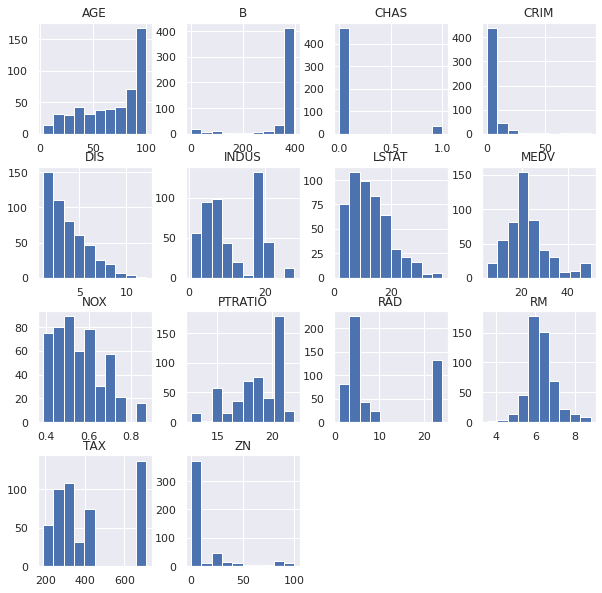

In [14]:
df_boston.hist(figsize=(10,10))
plt.show()

In these histograms you can get a quick look at your data.

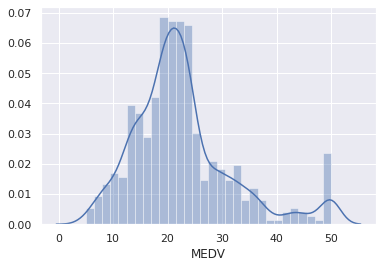

In [15]:
#Get a look in the distibution of the target MEDV
# Because it is a continuos variable, you can use bins
#and automatically the values are distributed in the bins 
sns.distplot(df_boston.MEDV, bins= 30)

In the distribution of the target (MEDV),  you can observate that the data is adjusted to a normal distribution with few outliers.



To compute the correlation between features, you will use a correlation matrix and display it using a heatmap.

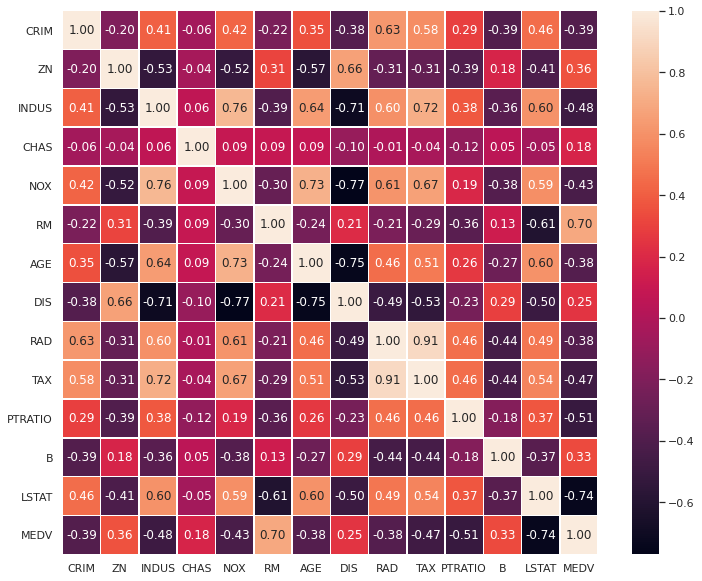

In [16]:
#Getting the correlation matrix and we round to two precision digits
correlation_matrix = df_boston.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot = True, fmt='.2f', linewidths=.5)



__Select the values more correlacted based on MEDV__

Get a look at MEDV on the row (x-axis) and its intersection with the features. We select those features whose values are over 0.7 for a positive correlation and  below -0.7 for a negative correlation, namely, RM (0.7) and LSTAT(-0.74). 


__Store the target and the features that will feed the model__

The np.c_ method will be used to concatenate the selected feaures in a variable called X.

In [17]:
X = pd.DataFrame(np.c_[df_boston.RM, df_boston.LSTAT], columns=['RM', 'LSTAT'])
y = df_boston.MEDV
y.head(), X.head()

(0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: MEDV, dtype: float64,
       RM  LSTAT
 0  6.575   4.98
 1  6.421   9.14
 2  7.185   4.03
 3  6.998   2.94
 4  7.147   5.33)

__Splitting the data into training and test datasets__   
You will use the well-know the train_test_split method from model selction class, which splits  75% of the data for training and the remaining 25% for testing. 

More details about this method can be found at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
print('Training dataset: X_train=', X_train.shape, ', y_train', y_train.shape)
print('Testing dataset: X_test=', X_test.shape, ', y_test', y_test.shape)


Training dataset: X_train= (379, 2) , y_train (379,)
Testing dataset: X_test= (127, 2) , y_test (127,)


__Establish a baseline__

In this case, you will create a naive baseline based on the mean of the target, and you will get the root of  mean squared error RMSE. Your model should have less RMSE than the baseline, to be considered an aceptable model. 



In [19]:
baseline = np.mean(y)
#Get an array with baseline with the size of the testing dataset 
y_baseline = np.repeat(baseline, len(y_test))
# import the metric 
from sklearn.metrics import mean_squared_error
#y_test are the true values of y 
naive_RSME = mean_squared_error(y_test, y_baseline)
naive_RSME=np.sqrt(naive_RSME)
naive_RSME

8.442762930708769

You model should be better than the naive baseline for which the RMSE value is 8.44.

__Training or fit and testing the Support Vector Regression model__


From sklearn.svm import SVR

SVR(kernel='rbf', gamma='scale', epsilon=0.1, C= 1.0)

The main parameters are: 
* __kernel__ defines the kernel type used in SVR. The kernel can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. By default 'rbf'.
* __gamma__ indicates the kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. By default 'scale'= 1 / (n_features * X.var()) as a gamma value. Otherwise, 'auto'= 1 / n_features.
* __epsilon__  specifies the epsilon-tolerance within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value. By default 0.1
* __C__ is the regularization parameter. By default 1.0



More details about the parameters of SVR can be found at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [20]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
# Fit or training the models 
svr_rbf.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

__Model evaluation__ 

You will measure the performance of you model using RMSE, looking at the performance in both training and testing datasets. 


In [21]:
#Prediction in the training dataset
y_rbf_train_predict = svr_rbf.predict(X_train)

##Prediction in the testing dataset 
y_rbf_test_predict = svr_rbf.predict(X_test)#4.22

RMSE_training = np.sqrt(mean_squared_error(y_train, y_rbf_train_predict))
RMSE_test=np.sqrt(mean_squared_error(y_test, y_rbf_test_predict))

print('The naive RMSE baseline is ', naive_RSME)
print('The model performance in training is ', RMSE_training)
print('The model performance in testing is ', RMSE_test)

The naive RMSE baseline is  8.442762930708769
The model performance in training is  4.160627719842799
The model performance in testing is  4.223047954157319


In conclusion, you have applied SVR and the model overcame the baseline. 

### Practice -

In your Jupyter notebook or datacamp light widget write code to read the diabetes dataset from sklearn.datasets. Predict the glucose of a person, which has values in the data  from 25 to 356. 

To perform the prediction, follow the steps  described above. You can try to use different kernels, namely, ['linear', poly, 'rbf'] to find out which has better performance when compared to a mean baseline you will establish. You can also tune the hyperparameters using GridSearchCV or RandomizedSearchCV.




### Solution 

#### Loading the diabetes  dataset 

In [22]:
#libraries 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
%matplotlib inline
sns.set()

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
# We converted the diabetes dataset in a DataFrame with the features 
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
#We added the target in the dataFrame 
df_diabetes['glucosa'] = diabetes.target
#display the data  
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,glucosa
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


__Data pre-processing__

Reviewing if the data has missing values

In [23]:
df_diabetes.isnull().sum()

age        0
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
glucosa    0
dtype: int64

__Data exploration__

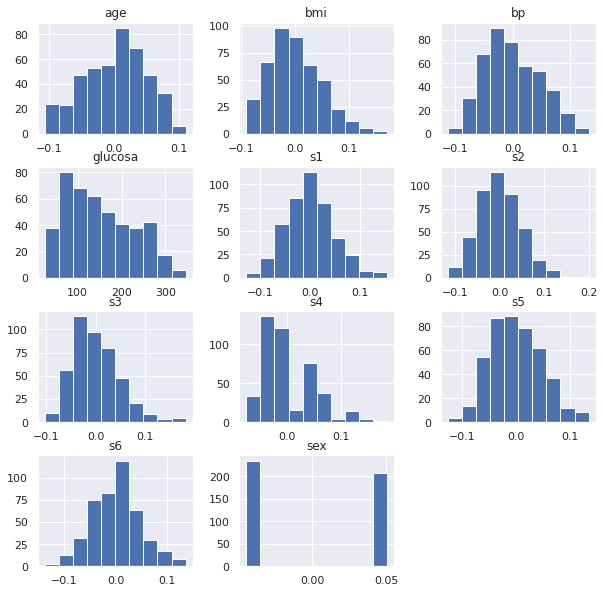

In [24]:
df_diabetes.hist(figsize=(10,10))
plt.show()

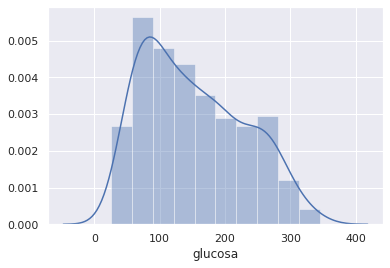

In [25]:
#Get a look in the distibution of the target
# Because it is a continuos variable we can do bins 
#and automatically the values are distribute in the bins 
sns.distplot(df_diabetes.glucosa, bins= 10)

In the distribution of the target (Glucose),  we can observate that the data is not adjusted to a normal distribution.


Find the correlation between the variables using a correlation matix and display this matix in a hetmap. 

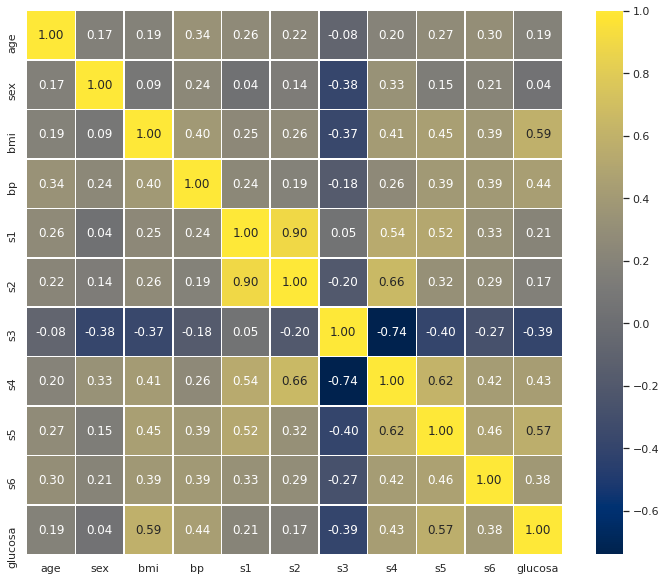

In [26]:
correlation_matrix = df_diabetes.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot = True, fmt='.2f', linewidths=.5, cmap='cividis')

None of the features  are highly correlated over the absolute value of 0.7, with the neares ones being s5 with 0.57 and bmi with 0.59. All features will be thus used. However, you can see that s1 and s2 are highly correlated, with a value of 0.9, so one can be dropped. Since s1 is more correlated with the target with 0.21, you will drop s2.

__Store the target and the features that will feed the model__

In [27]:
X = pd.DataFrame(np.c_[df_diabetes.age, df_diabetes.sex, df_diabetes.bmi, 
                      df_diabetes.s1, df_diabetes.s3, df_diabetes.s4,
                      df_diabetes.s5, df_diabetes.s6], columns=['age','sex', 'bmi', 
                      's1', 's3', 's4','s5','s6'])
y = df_diabetes.glucosa
y.head(), X.head()

(0    151.0
 1     75.0
 2    141.0
 3    206.0
 4    135.0
 Name: glucosa, dtype: float64,
         age       sex       bmi        s1        s3        s4        s5  \
 0  0.038076  0.050680  0.061696 -0.044223 -0.043401 -0.002592  0.019908   
 1 -0.001882 -0.044642 -0.051474 -0.008449  0.074412 -0.039493 -0.068330   
 2  0.085299  0.050680  0.044451 -0.045599 -0.032356 -0.002592  0.002864   
 3 -0.089063 -0.044642 -0.011595  0.012191 -0.036038  0.034309  0.022692   
 4  0.005383 -0.044642 -0.036385  0.003935  0.008142 -0.002592 -0.031991   
 
          s6  
 0 -0.017646  
 1 -0.092204  
 2 -0.025930  
 3 -0.009362  
 4 -0.046641  )

__Splitting the data into training and test datasets__   

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
print('Training dataset: X_train=', X_train.shape, ', y_train', y_train.shape)
print('Testing dataset: X_test=', X_test.shape, ', y_test', y_test.shape)


Training dataset: X_train= (331, 8) , y_train (331,)
Testing dataset: X_test= (111, 8) , y_test (111,)


__Establish a baseline__

You will be using a mean baseline for this and computing the RMSE.

In [29]:
baseline = np.mean(y)
#Get an array with baseline with the size of the testing dataset 
y_baseline = np.repeat(baseline, len(y_test))
# import the metric 
from sklearn.metrics import mean_squared_error
#y_test are the true values of y 
naive_RSME = mean_squared_error(y_test, y_baseline)
naive_RSME=np.sqrt(naive_RSME)
naive_RSME

74.6535779685982

You will then fit the model.

In [30]:
from sklearn.svm import SVR
#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_linear = SVR(kernel='linear', C=100, gamma='auto')
#svr_rbf = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# Fit or training the models 
svr_rbf.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

__Model evaluation__ 

You will compute the RMSE for both training and testing.

In [31]:
#Prediction in the training dataset
y_rbf_train_predict = svr_rbf.predict(X_train)
##Prediction in the testing dataset 
y_rbf_test_predict = svr_rbf.predict(X_test)#4.22
RMSE_training = np.sqrt(mean_squared_error(y_train, y_rbf_train_predict))
RMSE_test=np.sqrt(mean_squared_error(y_test, y_rbf_test_predict))
print('The naive RMSE baseline is ', naive_RSME)
print('The model performance in training is ', RMSE_training)
print('The model performance in testing is ', RMSE_test)

The naive RMSE baseline is  74.6535779685982
The model performance in training is  68.85185674865846
The model performance in testing is  64.10781673413423
